# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<11>`
* Students: `<MORTINIERA, WAGNER, GOMEZ, HAJRI >`
* Dataset: `<Free Music Archive>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform #NEED TO CHECK IF WE CAN USE IT
import warnings
warnings.filterwarnings('ignore') #don't want to display warnings

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

### 1. Load data

In [2]:
fma_data = 'fma_metadata/'
#1 Gb heavy files
features = pd.read_csv(fma_data +'features.csv') # the pandas dataframe with the features and labels

In [3]:
tracks = pd.read_csv(fma_data +'tracks.csv')
genres = pd.read_csv(fma_data +'genres.csv')
echonest = pd.read_csv(fma_data + "echonest.csv")

### 2. Cleaning part of tracks dataframe

In [4]:
tracks.head(10)

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
7,26,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,1060,en,Attribution-NonCommercial-NoDerivatives (aka M...,193,NaN,4,NaN,[],Where is your Love?
8,30,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,718,en,Attribution-NonCommercial-NoDerivatives (aka M...,612,NaN,5,NaN,[],Too Happy
9,46,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,252,en,Attribution-NonCommercial-NoDerivatives (aka M...,171,NaN,8,NaN,[],Yosemite


We see that the columns name are not correctly matched and we have a full Nan row in the second line. Lets remove the first two lines (line 1 and 2) and match the column names in the first line (line 0) to the dataframe column name.
We also drop all the tracks which don't have any "genre". According to the paper, they represent 2% of the tracks.
Finally, we notice also that we have duplicate columns name, like 'title' and 'id'. When reading the paper and inspecting the data, we conclude that they represent the album title, the track title, the album id and artist id. We rename the columns accordingly.

In [5]:
t = tracks.copy()
t.columns = t.iloc[0]
t.drop(t.index[0], inplace=True)
t.drop(t.index[0], inplace=True)
t = t.rename(columns={np.NaN: 'track_id'})
t = t.set_index('track_id')
t = t[t['genres'] != '[]']
t = t[['title', 'genres', 'genres_all', 'genre_top', 'id', 'name',]]
pd.io.parsers.ParserBase({'title':t.columns})._maybe_dedup_names(t.columns)
t = t.rename(columns={ t.columns[0]: 'album_title', t.columns[1] : 'track_title', t.columns[5] : 'album_id', t.columns[6] : 'artist_id'})
t.head()

,track_title,track_title,genres,genres_all,genre_top,artist_id,artist_id,name
track_id,,,,,,,,
2,AWOL - A Way Of Life,Food,[21],[21],Hip-Hop,1,1,AWOL
3,AWOL - A Way Of Life,Electric Ave,[21],[21],Hip-Hop,1,1,AWOL
5,AWOL - A Way Of Life,This World,[21],[21],Hip-Hop,1,1,AWOL
10,Constant Hitmaker,Freeway,[10],[10],Pop,6,6,Kurt Vile
20,Niris,Spiritual Level,"[76, 103]","[17, 10, 76, 103]",NaN,4,4,Nicky Cook


### Preparation of the feature dataframe. 
This table contains all the features with the associated labels (track_id). We can later use the genres as labels.

In [11]:
features.head(10)

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
5,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,8.8083887100e-01,-9.2319184542e-01,-9.2723226547e-01,6.6661673784e-01,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
6,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,9.9841135740e-01,1.7706941366e+00,1.6045658588e+00,5.2121698856e-01,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
7,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,7.7520370483e-01,8.4794059396e-02,-2.8929358721e-01,-8.1641042233e-01,4.3850939721e-02,...,9.5002755523e-02,2.2492416203e-02,2.1355332807e-02,1.6669036865e+01,4.6972656250e-01,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02
8,26,-6.9953453541e-01,-6.8415790796e-01,4.8824872822e-02,4.2658798397e-02,-8.1896692514e-01,-9.1712284088e-01,-9.0183424950e-01,-6.6844828427e-02,-2.9103723168e-01,...,1.0371652246e-01,2.5541320443e-02,2.3846302181e-02,4.1645809174e+01,2.5048828125e-01,1.8387714401e-02,1.5625000000e-02,0.0000000000e+00,4.6905956268e+00,1.4598459937e-02
9,30,-7.2148716450e-01,-8.4855991602e-01,8.9090377092e-01,8.8619679213e-02,-4.4551330805e-01,-1.2711701393e+00,-1.2401897907e+00,-1.3437650204e+00,-9.0560036898e-01,...,1.4169253409e-01,2.0426128060e-02,2.5417611003e-02,8.1665945053e+00,5.4687500000e-01,5.4416511208e-02,3.6132812500e-02,2.4414062500e-03,2.2447082996e+00,5.2673552185e-02


In [8]:
features.shape, features['feature'].is_unique

((106577, 519), True)

Since we have at our disposal a very huge dataset and our memory is limited we need to take a subsample of this dataset. Indeed, we have roughly \10^{5} tracks (1 row feature for each track), hence our adjacency matrix would have roughly \10^{10} entries which is too much for our memory space. Let's limit ourselves to only tracks with gender wich is only Rock or Hip-Hop.
Also, after some readings in the provided paper of the dataset and some research on Wikipedia, we choose to focus our computation on the Mel-frequency cepstrum coefficients (mfcc). Hence we will extract this columns from the feature dataframe, keeping the index as track_id (unique index). 
"Using variables without standardization can give variables with larger ranges greater importance in the analysis. Transforming the data to comparable scales can prevent this problem."
Hence we will standardize our sample of features.
Sources :
https://en.wikipedia.org/wiki/Mel-frequency_cepstrum, https://communities.sas.com/t5/SAS-Communities-Library/To-standardize-data-or-not-to-standardize-data-that-is-the/ta-p/361726


In [10]:
#features.iloc[3:, 253:393]
sample_ft = features.iloc[3:, 1:] #we look directly the columns index we want when exploring the data
sample_ft = sample_ft.apply(lambda x : pd.to_numeric(x))
sample_ft = (sample_ft - sample_ft.mean())/sample_ft.std() #normalize data
sample_ft.head(10)

,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
3,0.208783,0.452351,-0.008553,0.056481,0.079043,0.017718,0.071164,0.152168,0.090291,0.129121,...,-1.200554,-1.537649,-1.595035,-0.266430,0.425839,1.007357,0.874126,-0.454601,-0.369211,0.775695
4,0.044880,0.050426,0.001063,0.106159,0.090461,-0.020371,0.064405,0.046439,-0.012742,0.040800,...,-0.938944,-1.210800,-0.675909,-0.299408,0.463110,0.975153,0.643104,-0.454601,-0.491742,1.064848
5,0.002712,-0.024945,-0.061548,0.021789,0.109331,0.046419,-0.070494,-0.081501,0.063099,0.092097,...,-1.561597,-1.461119,-1.162616,-0.254635,-0.034719,0.011006,-0.065367,-0.454601,-0.335247,0.167181
6,0.101044,-0.044147,0.186566,-0.026460,0.071382,0.056075,0.088194,0.081984,0.043355,0.207548,...,-0.655210,-0.595294,-1.299385,-0.090254,0.385907,0.758695,0.889528,-0.454601,0.107731,0.018234
7,-0.019632,-0.035814,-0.013339,-0.000614,0.031972,-0.018958,-0.033153,-0.074345,-0.021467,-0.133377,...,-0.098755,0.151931,-0.085645,-0.143811,0.481745,-0.169453,-0.111571,-0.265063,-0.008018,-0.341556
8,-0.035296,-0.079482,-0.028641,-0.011932,-0.074125,-0.101243,-0.069236,-0.025944,-0.066941,-0.140352,...,0.136112,0.653688,0.321055,0.136905,-0.713576,-1.053095,-0.881648,-0.454601,0.484789,-0.942987
9,-0.035975,-0.094265,0.055730,-0.009523,-0.049270,-0.130320,-0.089167,-0.108398,-0.150393,0.291843,...,1.159703,-0.188117,0.577603,-0.239370,0.902371,0.050916,-0.234783,0.019244,-0.318367,0.453800
10,-0.017336,-0.095187,0.203179,-0.008581,-0.107198,-0.126147,-0.114378,-0.054949,-0.100258,1.313649,...,0.915480,1.915991,-0.093047,-0.165591,-0.859996,-0.494995,-0.357996,-0.454601,-0.120023,-0.718660
11,-0.046276,0.065874,0.019376,-0.068447,-0.086219,-0.117848,0.052632,-0.086368,-0.176111,-0.123722,...,1.166764,0.507580,0.542516,-0.055227,-0.053354,-0.604869,-0.666026,-0.454601,0.391577,-0.047219
12,0.014819,0.042658,0.024361,0.052995,0.042523,-0.019502,0.054530,-0.032942,0.098250,0.141020,...,-1.075463,-0.863469,-0.989482,-0.277982,0.207540,0.355902,0.227262,-0.454601,-0.462391,0.525310


In [12]:
rock_and_hiphop_tracks = t.loc[(t['genre_top'] == 'Hip-Hop') | (t['genre_top'] == 'Rock') ]
rock_and_hiphop_tracks.shape

(17734, 8)

In [13]:
rock_and_hiphop_tracks.head()

,track_title,track_title,genres,genres_all,genre_top,artist_id,artist_id,name
track_id,,,,,,,,
2,AWOL - A Way Of Life,Food,[21],[21],Hip-Hop,1,1,AWOL
3,AWOL - A Way Of Life,Electric Ave,[21],[21],Hip-Hop,1,1,AWOL
5,AWOL - A Way Of Life,This World,[21],[21],Hip-Hop,1,1,AWOL
134,AWOL - A Way Of Life,Street Music,[21],[21],Hip-Hop,1,1,AWOL
135,mp3,Father's Day,"[45, 58]","[58, 12, 45]",Rock,58,52,Abominog


In [14]:
features_and_tracks = sample_ft.copy()
features_and_tracks.index -= 2 
#shift index so that it start at one again. now lets merge the rock_and_hiphop_tracks with the features
features_and_tracks = pd.merge(features_and_tracks, rock_and_hiphop_tracks, left_index=True, right_index=True)
features_and_tracks = features_and_tracks.sample(frac=0.25)
features_and_tracks

,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,...,zcr.5,zcr.6,track_title,track_title,genres,genres_all,genre_top,artist_id,artist_id,name
71933,-0.005885,0.062555,-0.062835,-0.004556,-0.055103,-0.045826,0.065921,-0.044075,-0.037054,0.169038,...,0.409245,0.490740,Malice,Black Dahlia,[314],"[314, 12]",Rock,12746,14646,Dark Asylum Music
102194,-0.040088,-0.090279,0.101455,-0.053391,-0.046799,-0.100590,-0.067388,-0.026642,-0.100510,-0.048197,...,0.070738,-0.647451,EP,It's Brick Out,"[58, 113]","[113, 58, 26, 12]",Rock,16151,18163,Eidetic Seeing
104137,-0.042848,-0.103848,-0.022007,-0.046123,-0.080901,-0.063383,-0.038050,-0.069873,-0.089069,-0.123804,...,-0.475820,-1.148604,Everybody Loves Ramsden,America,[12],[12],Rock,16339,18279,Ramsden
35945,-0.012994,-0.039484,-0.116546,-0.015926,-0.004435,-0.114916,-0.070743,-0.011130,-0.052295,-0.088055,...,0.170781,-1.098758,Vol. 1 CD,mark,"[12, 98]","[98, 12]",Rock,7350,8646,mackay/watt/estel
64519,-0.023524,-0.101740,-0.122340,-0.042801,0.004089,-0.094483,-0.065061,0.013929,-0.048114,-0.056549,...,0.863320,-0.291351,The Heavy Links EP,Quality Control,[21],[21],Hip-Hop,11625,13476,Heavy Links
101943,0.015732,0.588649,0.156295,-0.014696,-0.003622,0.005739,0.044192,0.585780,0.041412,0.394548,...,-0.952698,-0.684841,Live on WFMU's Distort Jersey City with Reed D...,Long Island Lovin',"[25, 85]","[25, 12, 85]",Rock,16194,18238,Nancy
63393,-0.031872,-0.097218,0.315223,-0.047607,-0.065247,-0.069610,0.009546,-0.027358,-0.105155,0.038305,...,2.333282,0.713651,Sneaky Flute Moods: A Tribute to the Swirlies,The Vehicle Is Invisible,"[27, 66, 359]","[66, 27, 12, 359]",Rock,11479,13366,Nolan Smock & The Charming Youngsters
57472,-0.017213,0.001402,0.194287,-0.071844,-0.093614,-0.114220,0.094472,0.157536,0.115334,0.038144,...,-0.598426,-0.372076,Live at WFMU on Terre T's Cherry Blossom Clini...,Discount Fate,[25],"[25, 12]",Rock,10582,12474,Cruddy
73182,-0.000053,0.106098,0.093228,-0.006531,0.012118,0.016449,0.082286,0.107660,0.057831,0.093382,...,-1.236967,-0.561940,Live on WFMU's Distort Jersey City with Deed R...,Baxter's Corner,"[12, 25, 85]","[25, 12, 85]",Rock,12972,14775,Foster Care
101089,-0.026351,-0.097765,-0.140498,-0.062126,-0.027085,0.032626,0.034700,-0.008507,-0.165473,-0.157850,...,0.080171,2.203877,"Wm. Berger Presents My Castle of Quiet: Feb 5,...",Hallucinator,"[109, 361, 439]","[361, 12, 109, 439, 25, 31]",Rock,16153,18165,Ubasute


We should expect to have less than 17734 rows. Now lets create our network.

In [13]:
features_and_tracks.head()

,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,...,zcr.5,zcr.6,track_title,track_title,genres,genres_all,genre_top,artist_id,artist_id,name
68600,0.223079,-0.062329,-0.087164,-0.059522,0.016268,0.341991,-0.096112,-0.089269,-0.104938,-0.106619,...,-0.749668,-0.969525,Rap Trax 3,Christmas is for Faggots,[100],"[100, 21]",Hip-Hop,12257,8732,The Hate Noise
30052,-0.001947,-0.074359,-0.117032,-0.032929,-0.074979,-0.092624,-0.036622,-0.076031,-0.208720,-0.112819,...,0.503025,1.529511,Killah Cullah,BoB Marmalade,[21],[21],Hip-Hop,6391,7473,Cullah
35161,-0.024013,-0.087454,-0.088943,-0.010395,-0.054062,-0.087369,-0.053632,-0.047841,-0.092631,-0.080454,...,-0.492119,-0.548980,Cavity,Centering,"[45, 90]","[90, 53, 12, 45]",Rock,7233,8341,White Suns
38421,-0.038926,-0.058352,-0.126863,-0.038873,-0.015645,-0.050457,-0.074551,-0.093705,-0.153852,-0.166706,...,-0.368029,0.157437,Griller,Canker,[71],"[25, 12, 71]",Rock,7702,9177,Ut
44973,-0.011569,-0.044203,-0.069179,-0.073462,-0.105518,-0.127761,-0.048215,-0.061678,-0.211372,-0.166272,...,0.543008,0.023300,Los últimos diez minutos de Maria Duval,Submarinos,"[25, 85]","[25, 12, 85]",Rock,8720,10380,Los Negretes


In [14]:
attributes = features_and_tracks.iloc[:, :-8].apply(lambda x : pd.to_numeric(x)) #we look directly the columns index we want when exploring the data
attributes = (attributes - attributes.mean())/attributes.std() #normalize data
attributes.head()

,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
68600,0.436237,-0.329291,-0.045154,-0.034455,0.023136,2.968711,-0.954972,-0.649852,-0.336077,-0.389380,...,-0.022266,-0.073236,1.256986,-0.481281,-1.386000,-0.824870,-0.624026,0.218853,-0.832526,-0.971072
30052,-0.016143,-0.406843,-0.055681,-0.027526,-0.137504,-0.670104,-0.292261,-0.542591,-0.697982,-0.414394,...,-1.245263,-0.670863,-0.879041,-0.099386,0.661577,-0.313345,-0.580880,-0.079632,0.573192,1.436335
35161,-0.060505,-0.491262,-0.045781,-0.021655,-0.100679,-0.626107,-0.481758,-0.314169,-0.293160,-0.283810,...,-0.573554,-0.117622,-0.529569,-0.459101,-1.272095,-0.608265,-0.595262,-0.378117,-0.543515,-0.565946
38421,-0.090484,-0.303652,-0.059146,-0.029075,-0.033046,-0.317061,-0.714791,-0.685793,-0.506647,-0.631815,...,1.166199,0.496895,0.450373,-0.416866,-0.293055,0.186945,0.109454,0.368095,-0.404267,0.114569
44973,-0.035487,-0.212444,-0.038815,-0.038087,-0.191269,-0.964290,-0.421405,-0.426288,-0.707228,-0.630065,...,0.239027,-0.235579,0.377360,0.353601,1.692146,0.173691,0.339565,0.144232,0.618060,-0.014650


In [15]:
#patrik recup labels
labels = features_and_tracks.loc[:,'genre_top']
np.save('labels', labels)
labels

68600     Hip-Hop
30052     Hip-Hop
35161        Rock
38421        Rock
44973        Rock
80102        Rock
71638        Rock
40280        Rock
52580     Hip-Hop
75267        Rock
54729        Rock
76505        Rock
36990     Hip-Hop
93606        Rock
62500        Rock
90712        Rock
89881        Rock
76480     Hip-Hop
33187        Rock
32602        Rock
57453        Rock
72631        Rock
89178     Hip-Hop
80666        Rock
56646        Rock
93611        Rock
106562       Rock
63005        Rock
105963       Rock
72786     Hip-Hop
           ...   
67565        Rock
57582        Rock
32690     Hip-Hop
61610     Hip-Hop
50303        Rock
70245        Rock
42443        Rock
69558     Hip-Hop
30246     Hip-Hop
54005     Hip-Hop
40518     Hip-Hop
92515        Rock
46200        Rock
37054        Rock
98247        Rock
95249        Rock
38516        Rock
88902        Rock
36741        Rock
66355        Rock
58583        Rock
47923        Rock
57255        Rock
61809        Rock
72732     

### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in the  [graph from edge list]() demo.

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. In the [graph from features]() demo Benjamin showed you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [21]:
A = attributes.values
distances = A.dot(A.T) / (np.linalg.norm(A, axis = 1) * np.linalg.norm(A.T, axis=0))
distances = np.abs(1 - distances)
distances[distances < 1e-12] = 0
distances[0,1] == distances[1,0]

False

In [22]:
A = attributes.values
U = A.T/np.linalg.norm(A, axis =1)
U = U.T
cosSim = U@U.T
cosDist = abs(1.0 -cosSim)
cosDist[cosDist < 1e-10 ] = 0
distances = cosDist

In [23]:
cosDist

array([[0.        , 0.69260136, 0.8195003 , ..., 1.2287641 , 1.05369041,
        1.15515262],
       [0.69260136, 0.        , 0.96293128, ..., 0.97281339, 1.05523251,
        0.89721079],
       [0.8195003 , 0.96293128, 0.        , ..., 1.22635683, 0.85374113,
        1.10324088],
       ...,
       [1.2287641 , 0.97281339, 1.22635683, ..., 0.        , 0.78559043,
        0.95391398],
       [1.05369041, 1.05523251, 0.85374113, ..., 0.78559043, 0.        ,
        0.97673743],
       [1.15515262, 0.89721079, 1.10324088, ..., 0.95391398, 0.97673743,
        0.        ]])

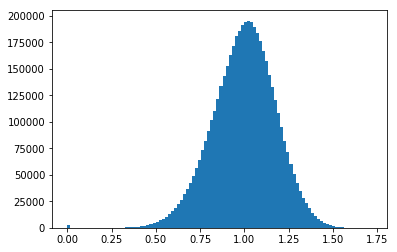

In [24]:
plt.hist(distances.reshape(-1), bins=100);
plt.show()

In [25]:
kernel_width = distances.mean()
W = np.exp(-distances**2 / kernel_width**2) # the adjacency matrix
n_nodes = len(W) # the number of nodes in the network
np.fill_diagonal(W, 0)
sparse = W
def f(x) :
    return [0 if np.abs(i) < 0.65 else 1 for i in x ]

#sparse= np.apply_along_axis(f, 1, sparse)

Our sparseAll graph is undirected. We need to make it directed to run Dijkstras algorithm. So we keep only the low triangular side of the matrix

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

In [26]:
sparse

array([[0.        , 0.61778436, 0.50952947, ..., 0.21961004, 0.32801189,
        0.26192001],
       [0.61778436, 0.        , 0.39418051, ..., 0.38668221, 0.32694263,
        0.44565607],
       [0.50952947, 0.39418051, 0.        , ..., 0.22091704, 0.48104715,
        0.29463736],
       ...,
       [0.21961004, 0.38668221, 0.22091704, ..., 0.        , 0.53814813,
        0.40108079],
       [0.32801189, 0.32694263, 0.48104715, ..., 0.53814813, 0.        ,
        0.38372359],
       [0.26192001, 0.44565607, 0.29463736, ..., 0.40108079, 0.38372359,
        0.        ]])

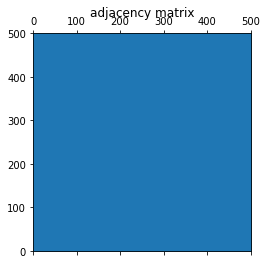

In [27]:
plt.spy(sparse, markersize=1)
plt.title('adjacency matrix')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.show()

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [46]:
## Your code here.
N = len(sparse)
L_max = int(N*(N-1) / 2)
L = (sparse[np.where(np.abs(sparse) > 0 )]).sum()
print('The maximum number of links in the network is {:d}.'.format(L_max))
print('The number of links L in the network is {:d}.'.format(L))

The maximum number of links in the network is 2427706.
The number of links L in the network is 162846.


### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**Your answer here.**
Our current grah is directed but the first one was undirected

In [47]:
# Your code here.
sparse
(sparse == sparse.T).all()

True

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [48]:
np.save('all_star', sparse)

In [49]:
# Your code here.
# Your code here.
np.save('symmetrized_matrix', sparse)
attributes.to_csv('sample_features.csv', sep=',')

### Question 4

Are the edges of your graph weighted?

**Your answer here.** 

No, we created a weighted adjacency matrix first, but then we have done a one hot encoding to distinguish between the existence of a link or not and also because we are only interested into the hop distances after for the Dijkstra algorithm.

### Question 5

What is the degree distibution of your network? 

In [50]:
degree = sparse.sum(axis=0)
degree

array([207, 102,  52, ..., 109,  99,  55])

Execute the cell below to see the histogram of the degree distribution.

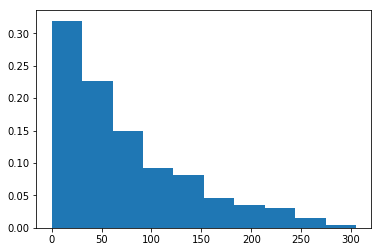

In [51]:
weights = np.ones_like(degree)/float(len(degree))
plt.hist(degree, weights = weights);
plt.show()

What is the average degree?

In [52]:
# Your code here.
np.mean(degree)

73.88656987295826

### Question 6

Comment on the degree distribution of your network.

**Your answer here.**

We can see that our distribution is the same as a scale free network i.e. power law distribution.

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

Lets implement DFS to check whether the graph is connected or not.

In [53]:
def dfs_recursive(node, neighbors, visited=None): #Not used because of python limited depth recursion
    if visited is None:
        visited = set()
    visited.add(node)
    for next in set(neighbors[node]) - visited:
        dfs(next, neighbors, visited)
    return visited

def dfs(node, neighbors):
    visited, stack = set(), [node]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(list(set(neighbors[vertex]) - visited))
    return visited


            

def connected(adj) :
    neighbors = []
    for i in range(len(adj)) :
        tmp = np.where(adj[i] > 0)[0]
        neighbors.append(tmp) #all of its neighbors
    
    deg = adj.sum(axis=0)
    start_node = np.argmin(deg) #start on the less degree node. Allow to detect fast enough if a graph is connected or not
    visited = dfs(start_node, neighbors)
    print(visited)
    return (len(visited) == len(adj))

In [54]:
def connected_graph(adjacency):
    """Determines whether a graph is connected.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """
    
    # Your code here.
    
    return connected(adjacency)

In [55]:
test = np.array([[0,1,0,0,1,0,1], [1,0,1,0,1,0,0], [0,1,0,1,0,0,0], [0,0,1,0,1,1,0], [1,1,0,1,0,0,0], [0,0,0,1,0,0,0],[1,0,0,0,0,0,0]])
connected_graph(test)

{0, 1, 2, 3, 4, 5, 6}


True

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [56]:
# Your code here.
connected_graph(sparse)

{423}


False

The graph is not connected. 

### Question 8

Write a function that extracts the connected components of a graph.

Basically, the algorithm is almost the same as earlier. We just need to run DFS on all nodes in the network.

In [57]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    
    # Your code here.
    neighbors = []
    for i in range(len(adjacency)) :
        tmp = np.where(adjacency[i] > 0)[0]
        neighbors.append(tmp) #all of its neighbors
        
    visited = set()
    components = []
    for i in range(len(adjacency)) :
        if(i not in visited) :
            tmp = dfs(i, neighbors)
            visited = visited.union(set(tmp))
            adjTmp= adjacency[:,list(tmp)][list(tmp),:]
            components.append(adjTmp)
    
    return components


How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

In [58]:
# Your code here.
find_components(test)

[array([[0, 1, 0, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0],
        [1, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0]])]

In [59]:
components = find_components(sparse)
print('Our network is composed of {:d} connected components'.format(len(components)))


Our network is composed of 12 connected components


In [60]:
index = np.argmax([len(i) for i in components])
size = len(components[index])
print('The size of the largest connected component is {:d}'.format(size))

The size of the largest connected component is 2193


### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [61]:
def compute_shortest_path_lengths(adjacency, source):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    
    # Your code here.
    neighbors = []
    for i in range(len(adjacency)) :
        tmp = np.where(adjacency[i] > 0)[0]
        neighbors.append(tmp) #all of its neighbors
    S = set()
    N = len(adjacency)
    nodes = set(np.arange(0, N))
    deltas = [np.inf] * N #set to infinity all distances from source
    deltas[source] = 0
    while(len(S) < N) :
        distance_nodes = []
        for k in range(len(deltas)) :
            distance_nodes.append((deltas[k],k))
            mini = np.inf
            for dist, n in distance_nodes :
                if(not n in S and dist < mini) :
                    mini = n
        a = mini
        S.add(a)
        a_neighbors = set(neighbors[a])
        for b in (a_neighbors - S) :
            deltas[b] = np.min((deltas[b], deltas[a] + 1)) #hop distance, not the weighted sum
            
    shortest_path_lengths = deltas
    
    return shortest_path_lengths 


In [62]:
compute_shortest_path_lengths(test, 0)

[0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0]

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

In [ ]:
# Your code here.
def diametre(adjacency):
    diametre = 0.0

    for i in range(0,len(adjacency)):
        a = compute_shortest_path_lengths(adjacency,i)
        if(np.nanmax(a[a != np.inf])>diametre):
            diametre = np.nanmax(a[a != np.inf])
    print(diametre)

In [ ]:
t = components[index]
diametre(t)

Apparently our biggest connected component is not connected... We didn't had time to fix it but the mistake is probably in the function where we create connected components

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [294]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    # Your code here.
    result = np.linalg.matrix_power(adjacency, length)
    n_paths = result[source, target]
    
    return n_paths

Test your function on 5 pairs of nodes, with different lengths.

In [295]:
print(compute_paths(sparse, 0, 10, 1))
print(compute_paths(sparse, 0, 10, 2))
print(compute_paths(sparse, 0, 10, 3))
print(compute_paths(sparse, 23, 67, 2))
print(compute_paths(sparse, 15, 93, 4))

0
0
0
0
0


### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [296]:
# Your code here.
X_3 = np.linalg.matrix_power(sparse, 3)
(X_3[np.where(X_3 > 0)]).sum() #number of path of length 3 in graph

37046

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [297]:
def tri(node, neigh1, neigh2, neighbors) : #return 1 if and only if (node, neigh1 and neigh 2 form a triangle)
    b = (neigh1 in neighbors[node]) and (neigh2 in neighbors[node]) and (neigh1 in neighbors[neigh2]) 
    return int(b)

def combinations(nodes_list) : #return all combination of nodes in the list
    combs = []
    for i in nodes_list :
        for j in nodes_list :
            if(not (i == j)) :
                combs.append((i,j))
    return combs

def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    
    # Your code here.
    # Your code here.
    neighbors = []
    for i in range(len(adjacency)) :
        tmp = np.where(adjacency[i] > 0)[0]
        neighbors.append(tmp) #all of its neighbors
    
    neighborhood = neighbors[node]
    k = len(neighborhood)
    clustering_coefficient = 0
    pairs = combinations(neighborhood)
    for p in pairs :
        clustering_coefficient += tri(node, p[0], p[1], neighbors)
    if(k == 0 or k == 1) : #by convention
        clustering_coefficient = 0
    else :
        clustering_coefficient = 2 * clustering_coefficient /(k * (k -1))
    
    return clustering_coefficient
    

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [298]:
index = np.argmax([len(i) for i in components])
giant = components[index]

average_clust=0
for i in range(0,len(giant)):
    average_clust += compute_clustering_coefficient(giant, i)

average_clust *= 1/len(giant)
average_clust

0.17286594409420059